## Data PRE-PROCESSING
1. Transformer

## LabelEncoder

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
X=np.array(['Dog',
           'Cat',
           'Dog',
           'Bird'])

In [3]:
Transformer=LabelEncoder()
Transformer.fit(X)

LabelEncoder()

In [4]:
Transformer.transform(X)

array([2, 1, 2, 0], dtype=int64)

In the same line

In [5]:
Transformer.fit_transform(X)

array([2, 1, 2, 0], dtype=int64)

In [6]:
Transformer.inverse_transform(np.array([0,0,2,2]))

array(['Bird', 'Bird', 'Dog', 'Dog'], dtype='<U4')

We can't use LabelEncoder for 

In [16]:
X=np.array([['Dog', 'hair'],
           ['Cat','hair'],
           ['Dog','hair'],
           ['Bird','feathers']])


In [17]:
#Transformer=LabelEncoder()
#Transformer.fit_transform(X)

## Ordinal Encoder

In [18]:
from sklearn.preprocessing import OrdinalEncoder
Transformer=OrdinalEncoder()


In [19]:
Transformer.fit_transform(X)

array([[2., 1.],
       [1., 1.],
       [2., 1.],
       [0., 0.]])

## LabelBinarizer

In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

In [32]:
y=np.array(['Dog',
           'Cat',
           'Dog',
           'Bird'])

In [33]:
encoder=LabelBinarizer()
encoder.fit_transform(y)

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [34]:
encoder=LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

## OneHotEncoder

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
X=np.array([['Dog', 'hair'],
           ['Cat','hair'],
           ['Dog','hair'],
           ['Bird','feathers']])

In [23]:
encoder=OneHotEncoder()
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

## Normalisation

MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
X=np.array([[70],
            [80],
            [120]])

In [37]:
scaler=MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [38]:
X_test=np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

to clearly visualize the effect of the normalization


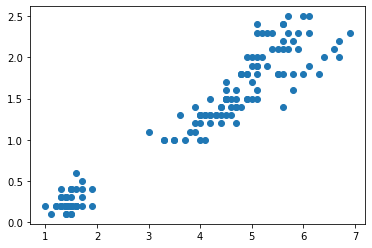

In [39]:
from sklearn import datasets
import matplotlib.pyplot as plt
iris=datasets.load_iris()
x=iris.data

plt.scatter(x[:, 2], x[:, 3])
plt.show()

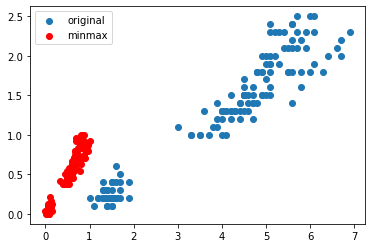

In [22]:
x_minmax=MinMaxScaler().fit_transform(x)

plt.scatter(x[:, 2], x[:, 3],label='original')
plt.scatter(x_minmax[:, 2], x_minmax[:, 3],c='red', label='minmax')
plt.legend()
plt.show()

StandardScaler

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
X=np.array([[70],
            [80],
            [120]])

In [25]:
scaler=StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

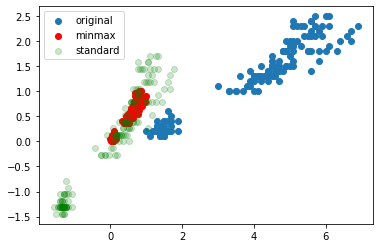

In [26]:
x_minmax=MinMaxScaler().fit_transform(x)
x_stdScaler=StandardScaler().fit_transform(x)

plt.scatter(x[:, 2], x[:, 3],label='original')
plt.scatter(x_minmax[:, 2], x_minmax[:, 3],c='red', label='minmax')
plt.scatter(x_stdScaler[:, 2], x_stdScaler[:, 3],c='green',alpha=0.2, label='standard')
plt.legend()
plt.show()

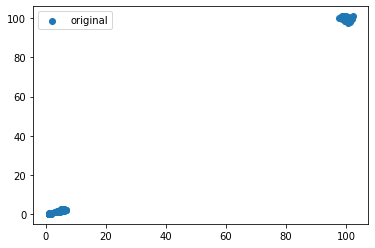

In [43]:
outliers=np.full((10,4),100)+np.random.randn(10,4)
x=np.vstack((x,outliers))

plt.scatter(x[:, 2], x[:, 3],label='original')
plt.legend()
plt.show()




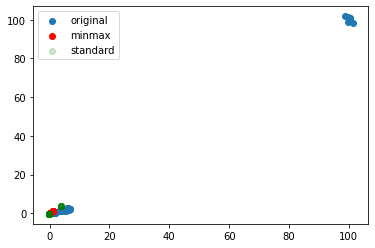

In [28]:
x_minmax=MinMaxScaler().fit_transform(x)
x_stdScaler=StandardScaler().fit_transform(x)

plt.scatter(x[:, 2], x[:, 3],label='original')
plt.scatter(x_minmax[:, 2], x_minmax[:, 3],c='red', label='minmax')
plt.scatter(x_stdScaler[:, 2], x_stdScaler[:, 3],c='green',alpha=0.2, label='standard')
plt.legend()
plt.show()

StandardScaler and MinMaxScaler are not effective in the presence of outliers 

RobustScaler

In [29]:
from sklearn.preprocessing import RobustScaler

X=np.array([[70],
            [80],
            [120]])

X_robust = RobustScaler()
X_robust.fit_transform(X)


array([[-0.4],
       [ 0. ],
       [ 1.6]])

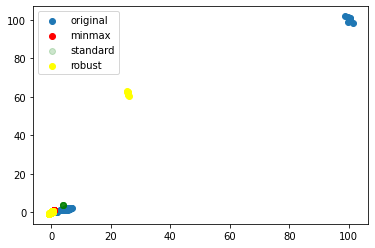

In [30]:
x_minmax=MinMaxScaler().fit_transform(x)
x_stdScaler=StandardScaler().fit_transform(x)
X_robust = RobustScaler().fit_transform(x)

plt.scatter(x[:, 2], x[:, 3],label='original')
plt.scatter(x_minmax[:, 2], x_minmax[:, 3],c='red', label='minmax')
plt.scatter(x_stdScaler[:, 2], x_stdScaler[:, 3],c='green',alpha=0.2, label='standard')
plt.scatter(X_robust[:, 2], X_robust[:, 3],  label='robust', color='yellow')
plt.legend()
plt.show()

## Imputation with Sklearn

### 1. SimpleImputer

In [93]:
from sklearn.impute import SimpleImputer

In [94]:
X = np.array([[10, 3],
              [0, 4],
              [5, 3],
             [np.nan, 3]])

imputer = SimpleImputer(missing_values=np.nan,
             strategy='mean')

imputer.fit_transform(X)

array([[10.,  3.],
       [ 0.,  4.],
       [ 5.,  3.],
       [ 5.,  3.]])

In [95]:
X_test = np.array([[12, 5],
                   [40, 2],
                   [5, 5],
                   [np.nan, np.nan]])

imputer.transform(X_test)

array([[12.  ,  5.  ],
       [40.  ,  2.  ],
       [ 5.  ,  5.  ],
       [ 5.  ,  3.25]])

## 2. KNNImputer

In [109]:
from sklearn.impute import KNNImputer

In [110]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

In [111]:
X_test = np.array([[np.nan, 35]])

imputer.transform(X_test)

array([[ 2., 35.]])

## 3. MissingIndicator

In [99]:
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [100]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, np.nan]])

MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [101]:


pipeline = make_union(SimpleImputer(strategy='constant', fill_value=-99),
                     MissingIndicator())

pipeline.fit_transform(X)



array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])